In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models, Input, Model
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as K

In [2]:
mask_path = '../ISIC2018_Task1_Training_GroundTruth_x2'
img_path = '../ISIC2018_Task1-2_Training_Input_x2'

In [3]:
def img_process_norm(img):
    img_raw = tf.io.read_file(img)
    img = tf.image.decode_jpeg(img_raw, channels=3)
    img = tf.image.resize(img, [256, 256])
    img /= 255.0
    return img

def mask_process_norm(mask):
    mask_raw = tf.io.read_file(mask)
    mask = tf.image.decode_png(mask_raw, channels=1)
    mask = tf.image.resize(mask, [256, 256])
    mask /= 255.0
    return mask

def implot_show(ds):
    for img, mask in ds:
        print(img.shape)
        display_list = [img, mask]
        plt.figure(figsize=(18, 18))
        for i in range(2):
            print(display_list[i].shape)
            plt.subplot(1, 2, i+1)
            plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
            plt.axis('off')
        plt.show()

In [4]:
def load_data():

    masks = os.listdir(mask_path)
    masks = [os.path.join(mask_path, path) for path in masks if path.endswith('png')]
    masks = tf.data.Dataset.from_tensor_slices(masks)
    mask_input_ds = masks.map(mask_process_norm, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    images = os.listdir(img_path)
    images = [os.path.join(img_path, path) for path in images if path.endswith('jpg')]
    images = tf.data.Dataset.from_tensor_slices(images)
    image_input_ds = images.map(img_process_norm, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    
    image_ds = tf.data.Dataset.zip((image_input_ds, mask_input_ds))
    
    implot_show(image_ds.take(2))
    
    return image_ds

In [5]:
def split_train_test_val(image_ds):
    size = 2594
    
    train_size = int(0.8 * size)
    val_size = int(0.1 * size)
    test_size = int(0.1 * size)
    
    train_image = image_ds.take(train_size)
    test_image = image_ds.skip(train_size)
    val_image = test_image.take(val_size)
    test_image = test_image.skip(val_size)
    
    return train_image, val_image, test_image

(256, 256, 3)
(256, 256, 3)
(256, 256, 1)


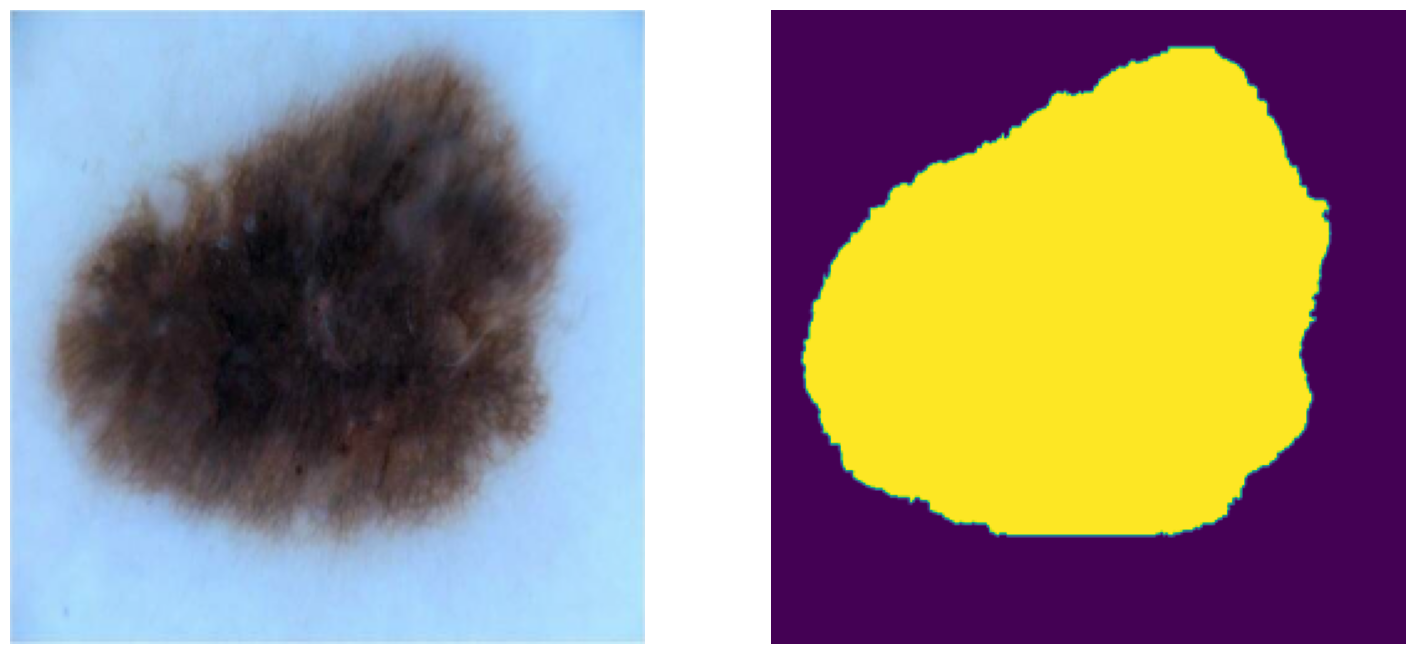

(256, 256, 3)
(256, 256, 3)
(256, 256, 1)


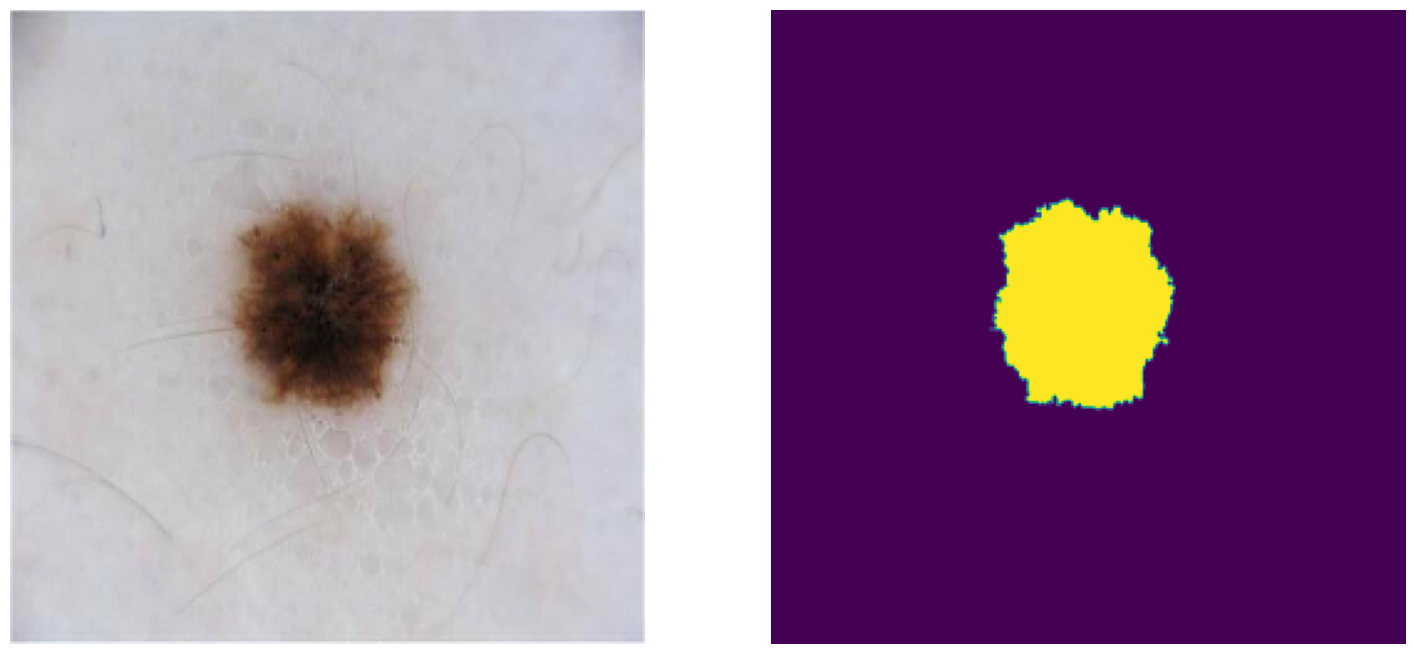

In [6]:
image_ds = load_data()

train_image, val_image, test_image = split_train_test_val(image_ds)